In [257]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 7, 5
from matplotlib.pyplot import figure

## Датасет bank_churners.csv

Загрузим исходные (без предобработки) данные

In [258]:
bank_data = pd.read_csv('../data/bank_churners.csv')

Удалим ненужные признаки из датасета

In [259]:
bank_data.drop('CLIENTNUM', axis=1, inplace=True)
bank_data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', axis=1, inplace=True);
bank_data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', axis=1, inplace=True);

С помощью столбчатой диаграммы изобразим распределения клиентов: по отношению
к банку и по половому признаку

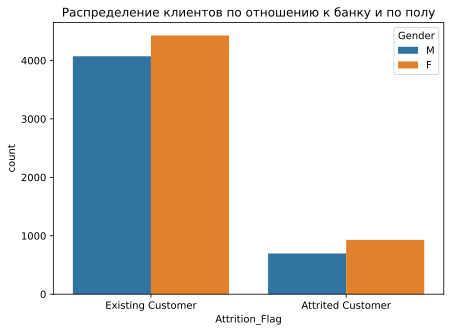

In [260]:
sns.countplot(x='Attrition_Flag', data=bank_data, hue='Gender');
plt.title("Распределение клиентов по отношению к банку и по полу");

Видно, что среди действующих и ушедших клиентов преобладают женщины.
Диаграмма иллюстрирует причину заинтересованности банка в уходе клиентов

Посмотрим на распределение клиентов по возрасту

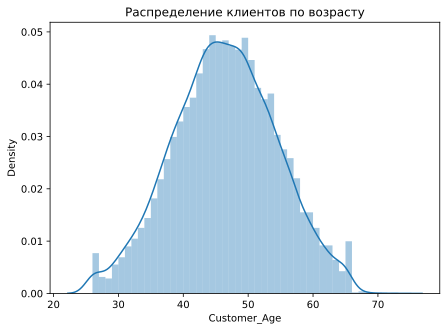

In [261]:
sns.distplot(bank_data["Customer_Age"]);
plt.title("Распределение клиентов по возрасту");

Гистограмма показывает, что клиенты по возрасту распределены нормально

Посмотрим на доходы клиентов

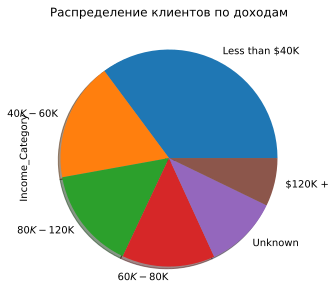

In [262]:
bank_data["Income_Category"].value_counts().plot(kind='pie', shadow=True)
plt.title('Распределение клиентов по доходам');

Можно сделать вывод о том, что треть людей получает доход меньше $40K

Посмотрим, как коррелируются между собой признаки

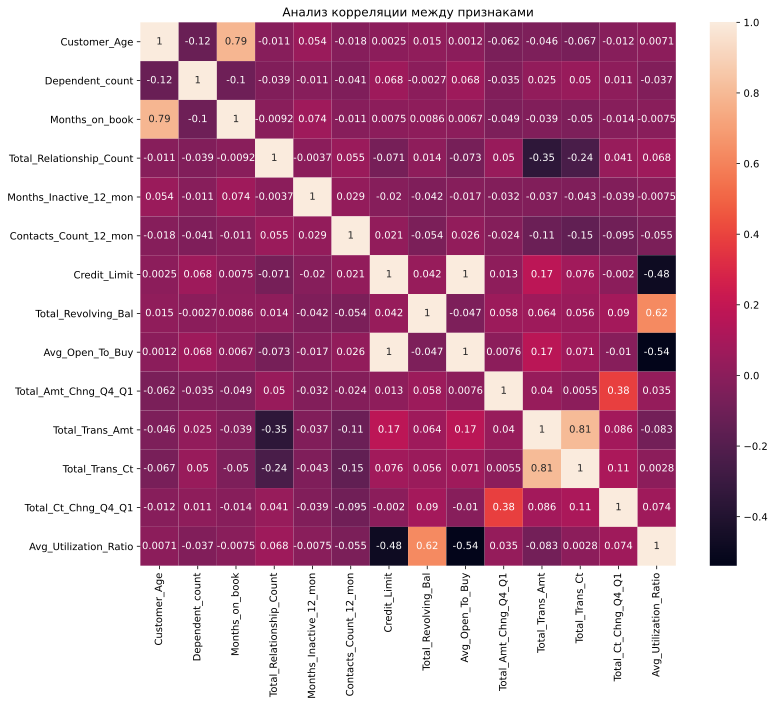

In [263]:
figure(figsize=(12,10))
sns.heatmap(bank_data.corr(), annot=True)
plt.title("Анализ корреляции между признаками");

Видно, что зависимость между возрастом клиента и временем его сотрудничества с банком близка к линейной (что логично). Также на данной иллюстрации можно увидеть другие зависимости между признаками

Посмотрим на диаграмму "ящик с усами" для признака, характеризующего потраченные клиентом средства

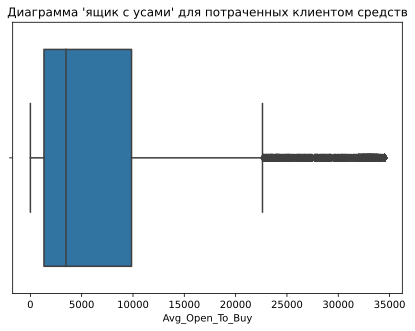

In [264]:
sns.boxplot(bank_data["Avg_Open_To_Buy"]);
plt.title("Диаграмма 'ящик с усами' для потраченных клиентом средств");

Видно, что медиана распределения потраченных средств находится около значения $4K.
Более того, видно большое разнообразие значений признака в диапазоне 5K до 10K. Также среди значений можно увидеть множество выбросов (аномалий распределения)

## Датасет apartment_data.csv

Загрузим исходные (без предобработки) данные

In [265]:
apartments_data = pd.read_csv('../data/apartment_data.csv')

Для начала посмотрим на распределение цен на апартаменты с помощью гистограммы

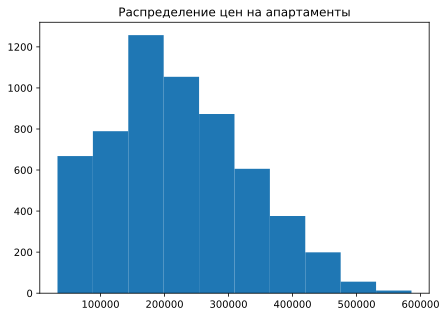

In [266]:
apartments_data["SalePrice"].hist(grid=False)
plt.title('Распределение цен на апартаменты');

По гистограмме видно, что при прогнозировании стоимости можно с большей вероятностью ожидать
значение в диапазоне 150000 - 250000

Теперь посмотрим, как зависит стоимость апартаментов от близости автобусной остановки
и/или станции метро

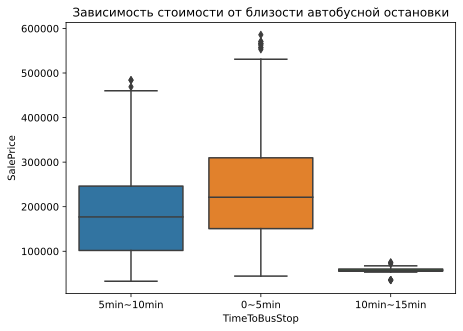

In [267]:
sns.boxplot(data=apartments_data, x='TimeToBusStop', y='SalePrice')
plt.title("Зависимость стоимости от близости автобусной остановки");

Очевидно, что чем ближе остановка, тем выше стоимость апартаментов

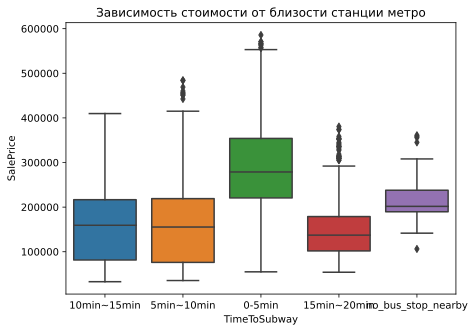

In [268]:
sns.boxplot(data=apartments_data, x='TimeToSubway', y='SalePrice')
plt.title("Зависимость стоимости от близости станции метро");

Видно, что в целом, зависимость следующая: чем ближе станция метро
тем выше стоимость. При этом учитывается еще наличие или отсутствие поблизости
автобусной остановки

Изучим зависимость стоимости от количества расположенных поблизости
объектов инфраструктуры

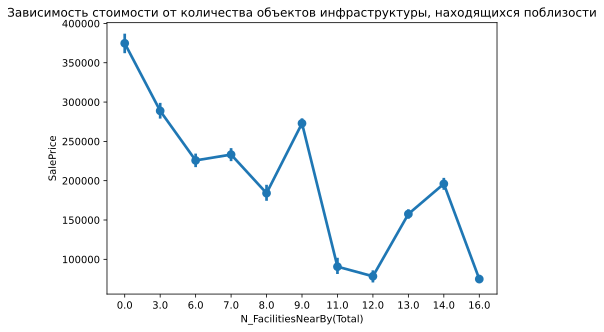

In [269]:
sns.pointplot(data=apartments_data, x='N_FacilitiesNearBy(Total)', y='SalePrice')
plt.title("Зависимость стоимости от количества объектов инфраструктуры, находящихся поблизости");

Вместо ожидаемой линейной зависимости получилась сложная зависимость - получается,
что наличие рядом с квартирой объектов инфраструктуры является далеко не самым информативным
признаком

С помощью круговых диаграмм посмотрим на распределение категориальных признаков (типа отопления,
прихожей и управления)

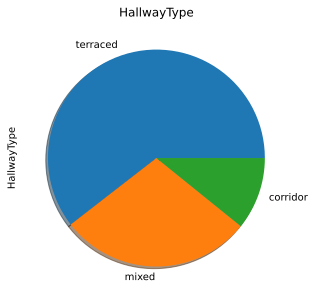

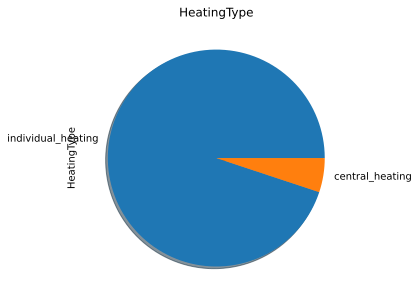

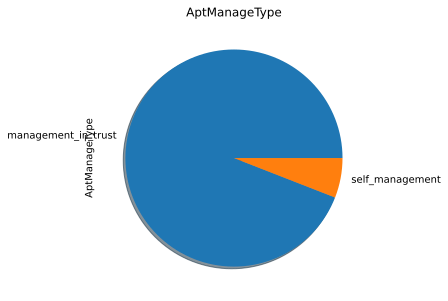

In [270]:
for feature in ["HallwayType", "HeatingType", "AptManageType"]:
    apartments_data[feature].value_counts().plot(kind='pie', shadow=True)
    plt.title(feature)
    plt.show();

Видно, что наиболее часто встречается террасный тип прихожей

Для подавляющего большинства апартаментов характерно индивидуальное
отопление и доверительное управление

В заключении посмотрим как признаки коррелируют между собой

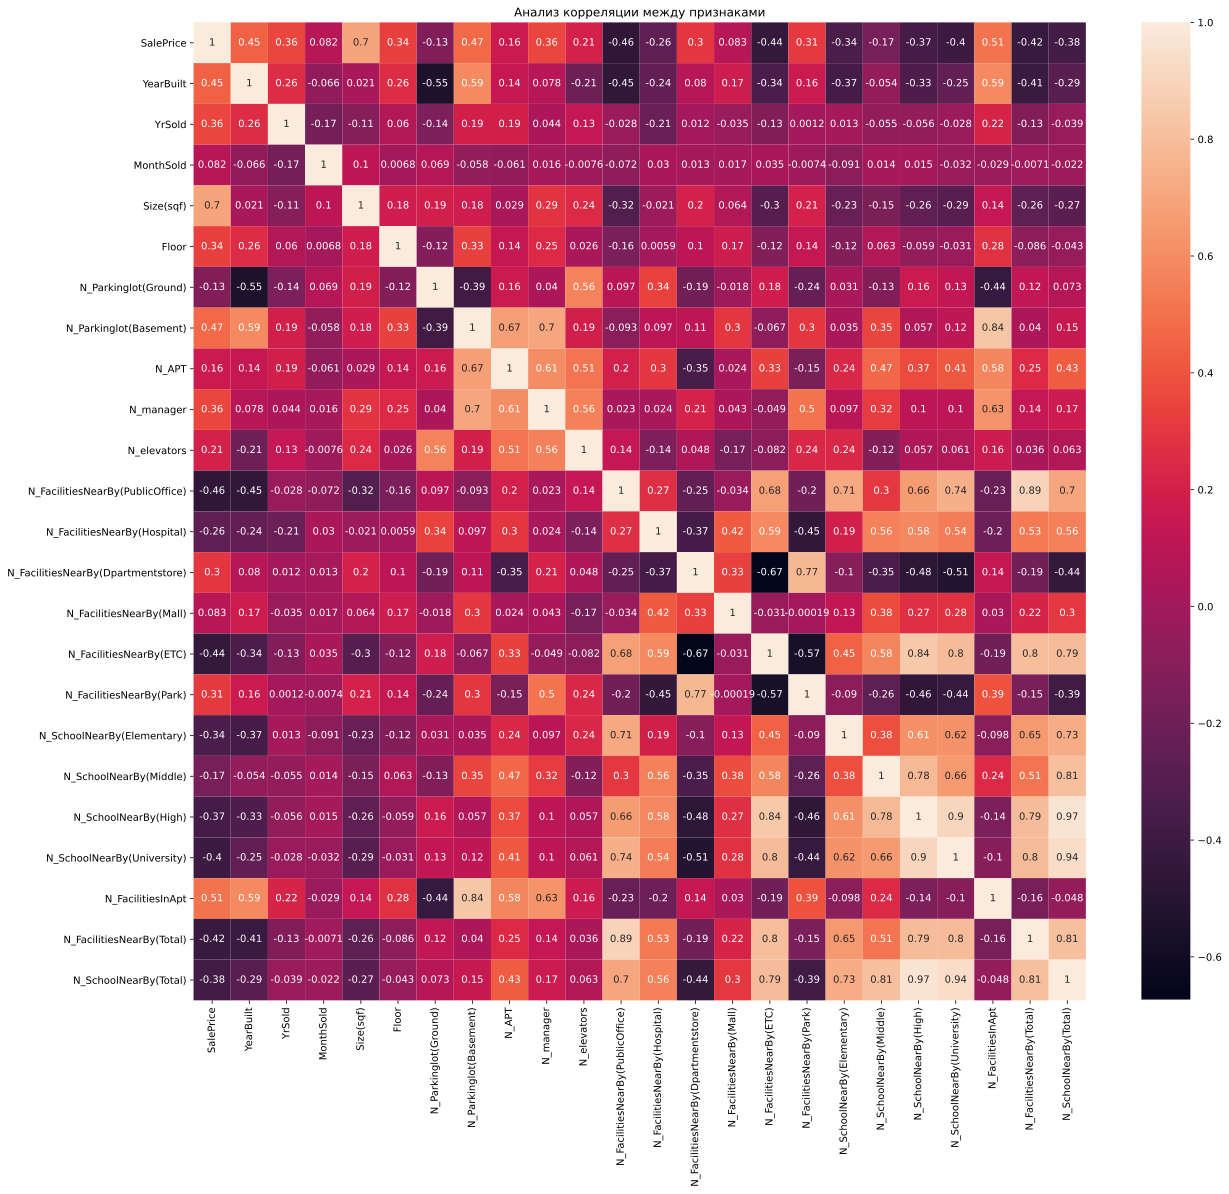

In [271]:
figure(figsize=(20,18))
sns.heatmap(apartments_data.corr(), annot=True)
plt.title("Анализ корреляции между признаками");

Можно выделить некоторые интересные закономерности: например, оказывается, что
количество спортивных объектов поблизости практически линейно зависит от количества наземных парковочных мест

Также видно, что существуют явные зависимости между конкретными и обобщающими признаками

Можно заметить, что наибольшее (линейное) влияние на стоимость апартаментов оказывают
площадь и количество парковочных мест, количество находящихся поблизости объектов (интересно,
что особенно сильно влияет количество спортивных объектов)